In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 在ipython中直接显示图像
%matplotlib inline

# 设置绘图显示中文字体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']

In [28]:
input_file_path = '房产信息_预处理.xlsx'
data = pd.read_excel(input_file_path)

data.head(5)

,描述,位置信息,区域,总价,单价,面积,建成时间,关注人数,0室0厅,0室1厅,...,西,北,东北,东南,西南,西北,中楼层,低楼层,高楼层,总楼层
0,威兰德装修套三对中庭，客户只给契税,威兰德小镇,双流,91.8,1.06,86.40,2016,135,0,0,...,0,0,0,0,0,0,1,0,0,26
1,房子清水套三户型方正采光好无遮挡，视野开阔！,南湖逸家二期,双流,128.5,1.94,66.12,2017,40,0,0,...,0,0,0,0,0,0,0,0,1,33
2,南湖逸家满二精装房，中间楼层，采光良好,南湖逸家二期,双流,153.0,2.08,73.59,2017,58,0,0,...,0,0,0,0,0,0,1,0,0,34
3,佰客郡精装修房子配套成熟业主真心卖,佰客郡,双流,89.0,1.18,75.40,2011,36,0,0,...,0,1,0,0,0,0,1,0,0,16
4,加贝书香尚品 精装修 带家具家电出售,加贝书香尚品,双流,64.5,1.25,51.69,2007,38,0,0,...,0,0,0,0,0,0,0,0,1,15


In [29]:
data.describe()

,总价,单价,面积,建成时间,关注人数,0室0厅,0室1厅,1室0厅,1室1厅,1室2厅,...,西,北,东北,东南,西南,西北,中楼层,低楼层,高楼层,总楼层
count,32774.000000,32774.000000,32774.000000,32774.000000,32774.000000,32774.000000,32774.000000,32774.000000,32774.000000,32774.000000,...,32774.000000,32774.000000,32774.000000,32774.000000,32774.000000,32774.000000,32774.000000,32774.000000,32774.000000,32774.000000
mean,157.886154,1.547791,100.300306,2009.326570,35.118936,0.000031,0.000031,0.017972,0.070544,0.002929,...,0.060841,0.102612,0.049979,0.298987,0.104656,0.058339,0.343809,0.293830,0.362360,19.070605
std,110.717674,0.626355,39.499149,5.662407,48.728153,0.005524,0.005524,0.132850,0.256065,0.054043,...,0.239042,0.303456,0.217904,0.457821,0.306114,0.234387,0.474986,0.455522,0.480689,10.773407
min,15.000000,0.170000,12.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,95.000000,1.120000,76.940000,2006.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
50%,131.000000,1.440000,90.220000,2010.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
75%,186.000000,1.860000,121.390000,2013.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,30.000000
max,4600.000000,13.480000,557.460000,2020.000000,1044.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,56.000000


Text(0.5, 0, '单价(万元)')

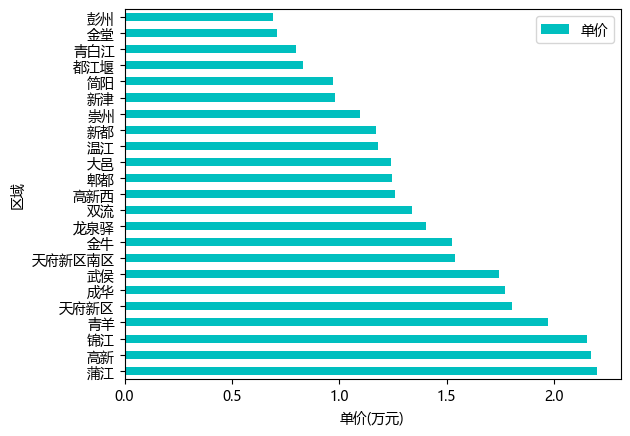

In [30]:
# 对区域进行数据透视并画图
data.pivot_table(values='单价', index='区域', aggfunc='mean'). \
    sort_values(by='单价', ascending=False).plot(kind='barh', color="c")
# 设置x轴标签
plt.xlabel('单价(万元)')

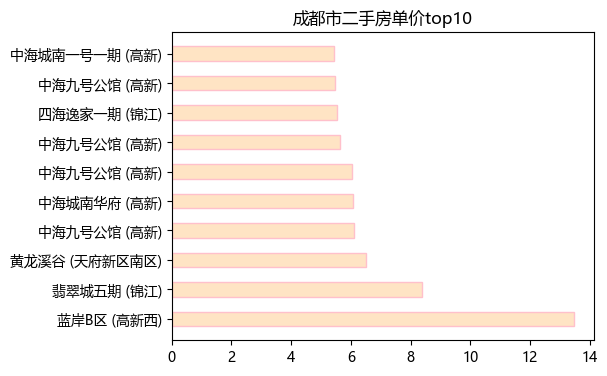

In [31]:
# 设置记录个数
ntop = 10
# 按单价对数据进行排序
data_top = data.sort_values(by='单价', ascending=False)[:ntop]

# 设置数据
y = range(len(data_top.单价))
width = data_top.单价
y_label = data_top.位置信息 + '(' + data_top.区域 + ')'

# plot
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(121)
ax.set_title('成都市二手房单价top10')
ax.barh(y, width, facecolor='bisque', edgecolor='pink', \
        height=0.5, tick_label=y_label)
plt.show()

Text(0, 0.5, '数量')

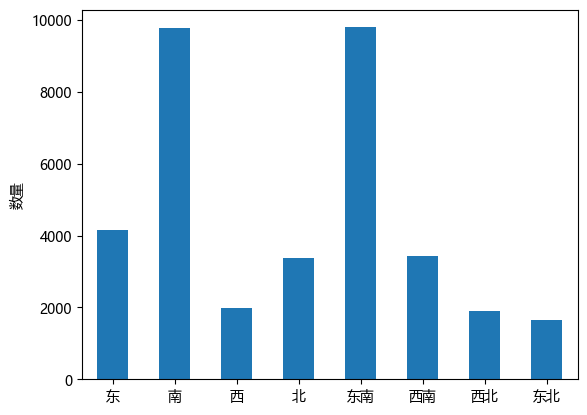

In [32]:
# 统计房屋朝向
data[['东', '南', '西', '北', '东南', '西南', '西北', '东北']].sum().plot(kind='bar', rot=0)
plt.ylabel('数量')

<Axes: xlabel='价格区间'>

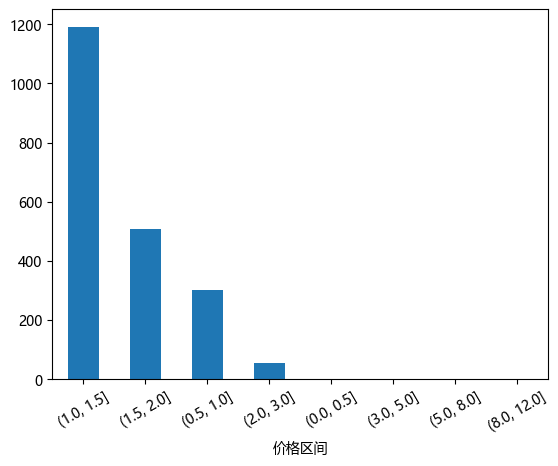

In [33]:
# 设置划分区间
bins = [0, 0.5, 1, 1.5, 2, 3, 5, 8, 12]
# 设置x轴标签
plt.xlabel("价格区间")
# plot
pd.cut(data[data['区域'] == '双流'].单价, bins).value_counts().plot(kind='bar', rot=30)

<Axes: xlabel='单价', ylabel='关注人数'>

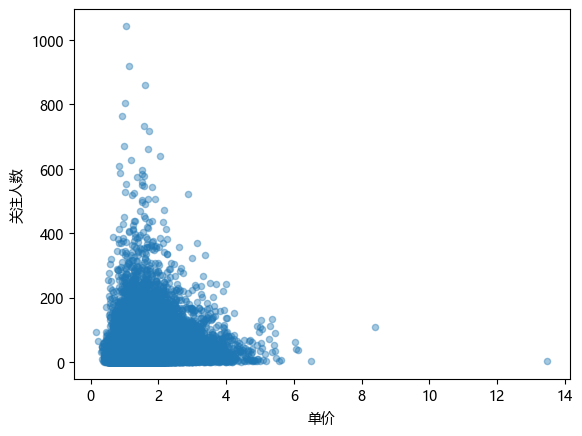

In [34]:
data.plot(kind="scatter", x="单价", y="关注人数", alpha=0.4)

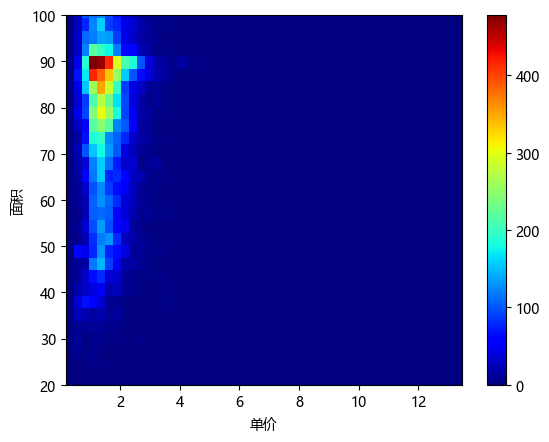

In [35]:
plt.hist2d(data.单价, data.面积, bins=(50, 200), cmap=plt.cm.jet)
plt.ylim((20, 100))
plt.xlabel('单价')
plt.ylabel('面积')
plt.colorbar()

<Axes: xlabel='单价', ylabel='关注人数'>

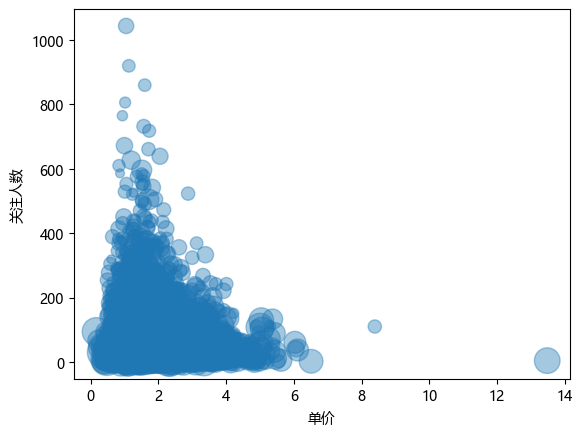

In [36]:
data.plot(kind="scatter", x="单价", y="关注人数", \
          alpha=0.4, s=data["面积"])

Text(0, 0.5, '房源数量')

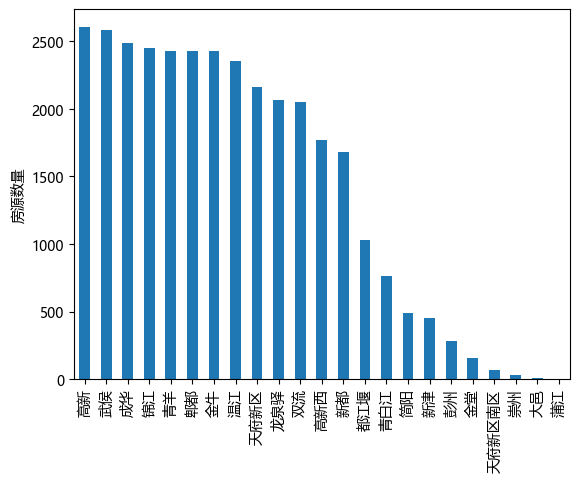

In [37]:
data.区域.value_counts().plot(kind='bar')
plt.ylabel('房源数量')

<Axes: xlabel='总楼层'>

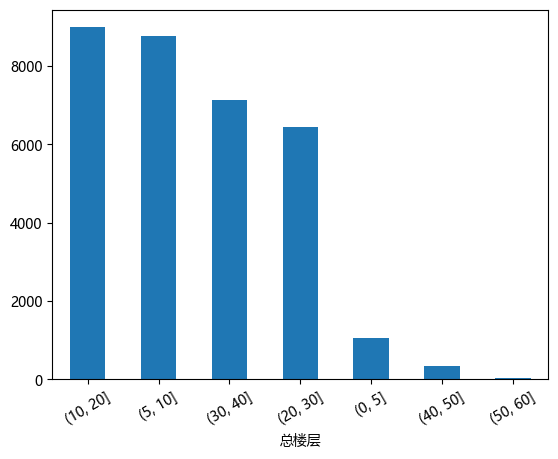

In [38]:
bins = [0, 5, 10, 20, 30, 40, 50, 60]
plt.xlabel("总楼层")
pd.cut(data.总楼层, bins).value_counts().plot.bar(rot=30)

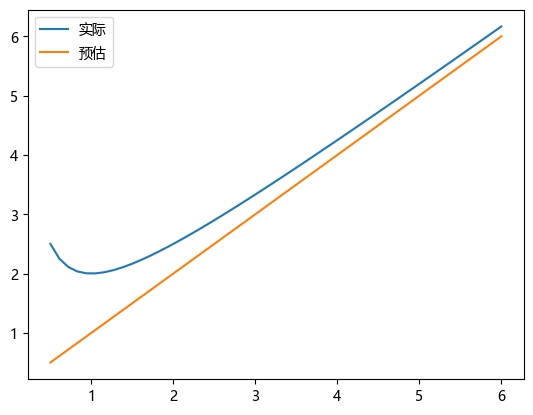

In [39]:
x = np.linspace(0.5, 6, 51)
y1 = x + (1 / x)
y2 = x

# 绘制模型估计值
plt.plot(x, y1)
# 绘制模型实际值
plt.plot(x, y2)

# 图形设置
plt.legend(["实际", "预估"])